<a href="https://colab.research.google.com/github/ana-arcila/FisicaExperimental/blob/main/FisExp2/Intensidad_vs_Resistencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2: mínimos cuadrados y ajuste de curva

Nombre: Greither Scarleth Quinayás Muñoz, Ana Maria Arcila Ortiz

_______________
* Conocimientos necesarios para desarrollar esta tarea:
  - Concepto de tendencia de los datos.
  - Método de regresión de mínimos cuadrados.
  - Ajuste lineal por mínimos cuadrados (caso particular de lo anterior).
  - Interpolación.
  - Reporte de medidas, análisis y propagación de error.

Estos conceptos se trabajan en Ifan Hughes, Thomas Hase. *Measurements and their uncertainties : A practical Guide to Modern Error Analisys*.Chap.5. de forma rápida, por lo que es recomendable consultar varias fuentes para un entendimiento completo. Para ello se deja material extra en el classroom y puede tomar otras fuentes que crea convenientes.

## Toma de datos experimentales
Un fotoresistor o LDR (light-dependent resistor) es un dispositivo cuya resistencia varia en función de la luz recibida. Asuma que la relación entre estas varaibles la da la ecuación:
$$I = \frac{500000}{R}. \quad(1)$$

Realice un montaje experimental con base en la imagen para registrar con el Arduino un conjunto de datos de $I$ vs $R$.

<img src="https://www.aranacorp.com/wp-content/uploads/pr-sensor-scheme_bb.png" width="500">

Utilice como fuente de iluminación la linterna de su telefono y varie la intensidad de la luz simplemente alejando el celular del sensor.

A continuación encuentra un código base para tomar los datos con el Arduino. (Notar que se debe completar el código)

```cpp
int sensorPin = A0;
float V = 0;
float Rldr=0;
float lux =0;

void setup() {
  Serial.begin(?); // complete el código remplazando ? por un argumento adecuado
}

void loop() {
  // read the value from the sensor:
  V = analogRead(sensorPin) * ?; // complete el código remplazando ? por el factor de conversión adecuado
  
  Rldr = (5-V) * 1000 / V;
  lux = 500 / (Rldr/1000);
  
  Serial.print(lux);
  Serial.print("\t");
  Serial.println(Rldr);
  delay(?); // complete el código remplazando ? por un argumento adecuado
}

```
## Análisis teórico 
A partir de los recursos porporcionados y valiendose de fuentes externas si es necesario, replique la deducción de los parametros de ajuste lineal por el método de mínimos cuadrados. Es decir, deduzca las expresiones para la pendiente y el intercepto de un ajuste lineal de la forma $y = mx + b$. 

$$ m = \frac{N \sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - \big(\sum x_i\big)^2}$$

$$ b = \frac{\sum x_i^2 \sum y_i - \sum x_i \sum x_i y_i}{N\sum x_i^2 - \big(\sum x_i\big)^2}$$

## Análisis de datos

### 1.Grafica de datos experimentales:
Graficar los datos experimentales. Verifique visualmente que sus datos presenten el comportamiento espereado. 

### 2. Ajuste lineal:
Hacer un ajuste lineal a los datos usando las expresiones del método de mínimos cuadrados (*method of least squares*). Tenga en cuenta que para ello necesita linealiazar los datos. Graficar el ajuste sobre los datos experimentales. Imprima en pantalla los valores obtenidos para la pendiente y el intercepto con las unidades correctas y analice la calidad del ajuste por medio del coeficiente de correlación de pearson.
 
Nota : Deje explicito cúales fueron las ecuaciones que uso para el cálculo de los parámetros de ajuste para facilitar la revisión y detección de errores.


##3. Ajuste usando `curve_fit()`: 
Ajustar los datos, pero ahora usando la función `curve_fit()`. Grafique el ajuste sobre los datos experimentales e imprima en pantalla los valores obtenidos para la pendiente y el intercepto con las unidades correctas. Analice las diferencias con respecto al resultado del punto dos y concluya.


## 4. Error en los parámetros de ajuste:
Determinar el error en los parámetros de ajuste, usando las fórmulas teoricas del método de mínimos cuadrados y el error que entrega `curve_fit()`. Imprima en pantalla todos los resultados. Compare, analice y concluya. Finalmente, reporte correctamente el valor de la pendiente y el intercepto con su respectivo error, usando los valores obtenidos con `curve_fit()`.

##5. Interpolación:
Use el modelo ajustado y reporte el valor de resitencia que obtendría de iluminar el fotorresistor con $83$ lx . Utilice propagación del error para reportar correctamente (No olvide que el modelo lineal es función de los párametros de ajuste).

# 1.Grafica de datos experimentales:

In [1]:
import pandas as pd

df = pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRUJBYk4ZbnkjIPUBihrayN4GfaJZqRVmQfCWjPaXEzMKUf033Mx-RUbqhvMFSQ4tXmM21hd8BHh370/pub?output=xlsx')

print(df)

        x         y
0  842.52    593.46
1   98.95   5053.25
2   42.99  11629.63
3   25.15  19877.55
4   16.15  30968.75
5   10.99  45500.00
6    8.96  55833.34


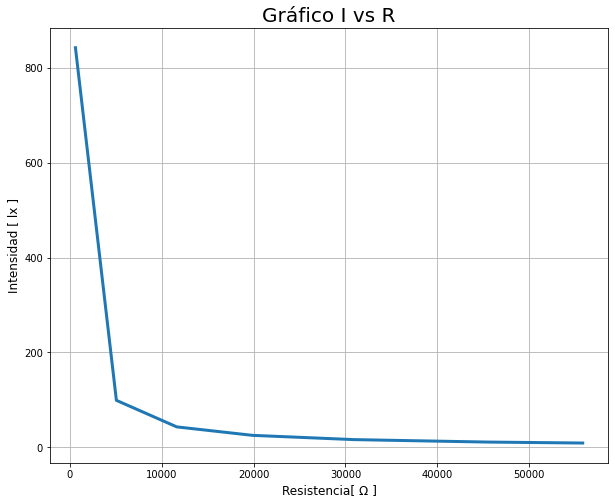

In [2]:
import matplotlib.pyplot as plt

Intensidad = df['x'].transpose().tolist()

Resistencia = df['y'].transpose().tolist()

plt.figure(figsize=(10,8))
plt.plot(Resistencia,Intensidad,linewidth=3)
plt.ylabel('Intensidad [ lx ]',fontsize=12)
plt.xlabel('Resistencia[ Ω ]',fontsize=12)
plt.title('Gráfico I vs R',fontsize=20)
plt.grid(True)
plt.show()

# 2. Ajuste lineal:

Las fórmulas usadas para el cálculo de los parámetros de ajuste son 

$$\chi ^{2}=\sum [y_i-(ax_i+b)]^{2}$$


$$\frac{d\chi ^{2}}{da}=0$$                  
      $$\frac{d\chi ^{2}}{db}=0$$   Resolviendo

$$ m = \frac{N \sum x_i y_i - \sum x_i \sum y_i}{N\sum x_i^2 - \big(\sum x_i\big)^2}$$

$$ b = \frac{\sum x_i^2 \sum y_i - \sum x_i \sum x_i y_i}{N\sum x_i^2 - \big(\sum x_i\big)^2}$$


In [3]:
from sympy import Symbol, Derivative, lambdify, diff, solve
from scipy import optimize
import numpy as np
m = Symbol('m')
b = Symbol('b')
#S es 𝜒 (chi)
S = 0
for i in range(0, len(Resistencia)):
  S += (np.log(Intensidad[i]) - m * np.log(Resistencia[i]) - b) ** 2


ds_dm = diff(S, m)
ds_db = diff(S, b) 

In [4]:
sol = solve([ds_dm, ds_db], (m, b))
M = sol[m]
B = sol[b]
print("La pendiente  obtenida es ",M,"y el intercepto es ",B)

La pendiente  obtenida es  -0.999930244214292 y el intercepto es  13.1218057467618


In [5]:
#coeficiente de correlación de pearson
S=0
for i in range(0, len(Resistencia)):
  S += (np.log(Intensidad[i]) - M * np.log(Resistencia[i]) - B) ** 2


In [6]:
R2=1-(S/(len(Resistencia)*np.var(Intensidad)))
print("el coeficiente de correlación de Pearson es ",R2)

el coeficiente de correlación de Pearson es  0.999999999999532


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


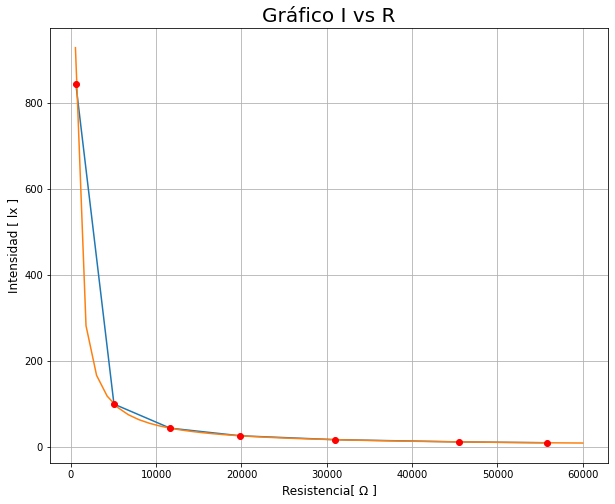

In [7]:
x = np.linspace(-700, 60000)
y = x ** float(M) * np.exp(float(B))
plt.figure(figsize=(10,8))
plt.plot(Resistencia, Intensidad)
plt.plot(x, y)
plt.plot(Resistencia, Intensidad, 'ro')
plt.ylabel('Intensidad [ lx ]',fontsize=12)
plt.xlabel('Resistencia[ Ω ]',fontsize=12)
plt.title('Gráfico I vs R',fontsize=20)
plt.grid(True)

# 3. Ajuste usando curve_fit():

In [8]:
def f(x, a, b):
  return x ** a * np.exp(b)

In [9]:
coeffs, _ = optimize.curve_fit(f, Resistencia, Intensidad)


In [10]:
print("La pendiente obtenida con curve_fit() es ",coeffs[0],"y el intercepto es ",coeffs[1])

La pendiente obtenida con curve_fit() es  -0.9999947514544134 y el intercepto es  13.122333749719962


Se puede concluir que los resultados obtenidos en el punto 2 son muy aproximados  a los valores obtenidos por la función Curve_fit() 


# 4. Error en los parámetros de ajuste:

In [11]:
#Error en los parámetros de ajuste usando las fórmulas teóricas
r=1/(len(Resistencia)-2)
t=1/R2-1 
IncM=M*((r*t)**(0.5))


In [12]:
c=0
for i in range(0, len(Resistencia)):
   c+= Resistencia[i]**2
print(c)


6702928150.3916


In [13]:
x2=c/len(Resistencia)
IncB=IncM*np.sqrt(x2)
perr =np.sqrt(np.diag(_))
print("El error en los parámetros de ajuste usando las fórmulas teóricas son σm =",IncM,"σb=",IncB)
print("El error que entrega curve_fit() son ",perr[0],"y",perr[1])

El error en los parámetros de ajuste usando las fórmulas teóricas son σm = -3.06015274750370e-7 σb= -0.00946948514072726
El error que entrega curve_fit() son  1.5016660353433171e-05 y 9.665453323974376e-05


El valor de la pendiente es -0.99 ± 1.50e-05 y el intercepto es  13.12 ±  9.67e-05

# 5. Interpolación:


In [14]:
from scipy.optimize import fsolve
def func(x):
  return [x[0]**float(M) * np.exp(float(B))-83]
root=fsolve(func,[1])
x=root[0]
dy_dm=np.exp(float(B))*x**float(M)*np.log(x)
dy_db=x**float(M)*np.exp(float(B))

In [15]:
import math
#propagación de errores
Error=math.sqrt((dy_dm**2*IncM**2)+(dy_db**2*IncB**2))
Error

0.7859672977690999

El valor de resistencia que se obtendría de iluminar el fotorresistor con 83 lx sería (6024.4 ± 0.8)Ω ohmios